# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfQuickSort = pd.read_csv("Results16/quickSort-PC16.csv")
dfQuickSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfMergeSort = pd.read_csv("Results16/mergeSort-PC16.csv")
dfMergeSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


#### Moving information from Test name to a seperate column 

In [72]:
#input type
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[0])

dfCounting["Input case"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[0])

dfQuickSort["Input case"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[0])

dfMergeSort["Input case"] = l

In [73]:
#input size
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[1])

dfCounting["Size"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[1])

dfQuickSort["Size"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[1])

dfMergeSort["Size"] = l


l = []
for i in range(len(dfReadCSV)):
    l.append(dfReadCSV.iloc[i]["Test name"].split("d")[-1])

dfReadCSV["Size"] = l

In [74]:


#removing values that are nonsense 
dfCounting = dfCounting[dfCounting['PKG (J)'] >= 0]
dfCounting = dfCounting[dfCounting['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
dfCounting = dfCounting[dfCounting['Time (ms)'] >= 0]

dfCounting = dfCounting.replace("  ", np.nan)

#missing values for each column
print("MISSING DATA: \n\n ", dfCounting.isnull().sum(axis=0))

dfReadCSV["Time (ms)"].sum()/1000/60/60


MISSING DATA: 

  Test name          0
PKG (J)            0
CPU (J)            0
GPU (J)        20799
Memory (J)         0
Temperature        0
Time (ms)          0
Input case         0
Size               0
dtype: int64


5.783314213333333

#### Removing ourliers

#### Subtract readCSV from data

In [75]:
#Counting sort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingRand{s[size]}"].mean())

for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingBest{s[size]}"].mean())

for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingWorst{s[size]}"].mean())

for i in range(len(dfCounting)):
    for size in range(len(s)):
        if (int(dfCounting["Size"][i]) == s[size]):
            if(dfCounting["Input case"][i] != "worst" and dfCounting["Input case"][i] != "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfCounting["Input case"][i] == "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfCounting["Input case"][i] == "worst"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                               

dfCounting["CPU - BG"] = l
dfCounting[dfCounting["Input case"] == "best"]


Test name   PKG (J)   CPU (J)  GPU (J)  Memory (J)  Temperature  \
10399    best-25000-1  1.878296  1.601929      NaN    0.118958           62   
10400    best-25000-1  1.876892  1.619263      NaN    0.113342           62   
10401    best-25000-1  1.891479  1.635620      NaN    0.111633           62   
10402    best-25000-1  1.797913  1.523071      NaN    0.118103           62   
10403    best-25000-1  1.755127  1.432678      NaN    0.127747           62   
...               ...       ...       ...      ...         ...          ...   
15594  best-1000000-1  6.719788  5.797974      NaN    0.380432           71   
15595  best-1000000-1  6.539246  5.623535      NaN    0.380737           71   
15596  best-1000000-1  6.512512  5.608704      NaN    0.366638           71   
15597  best-1000000-1  6.630493  5.714172      NaN    0.381470           70   
15598  best-1000000-1  6.861755  5.932434      NaN    0.407776           70   

       Time (ms) Input case     Size  CPU - BG  
10399    223.673       best    25000       NaN  
10400    195.949       best    25000       NaN  
10401    196.755       best    25000       NaN  
10402    216.795       best    25000       NaN  
10403    281.388       best    25000       NaN  
...          ...        ...      ...       ...  
15594    713.453       best  1000000       NaN  
15595    725.147       best  1000000       NaN  
15596    724.385       best  1000000       NaN  
15597    707.163       best  1000000       NaN  
15598    741.815       best  1000000       NaN  

[5200 rows x 10 columns]

In [76]:
#Bubblesort
bgAVGbubbleRand = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGbubbleRand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())

for i in range(len(dfBubbleSort)):
    for size in range(len(s)):
        if (int(dfBubbleSort["Size"][i]) == s[size]):
            if(dfBubbleSort["Input case"][i] != "worst" and dfBubbleSort["Input case"][i] != "best"):
                l.append(dfBubbleSort["CPU (J)"][i] - bgAVGbubbleRand[size]["CPU (J)"])
            if(dfBubbleSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfBubbleSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfBubbleSort["CPU - BG"] = l

dfBubbleSort


Test name     PKG (J)     CPU (J) GPU (J)  Memory (J)  \
0      random1-25000-1   13.232300   11.544128            0.399902   
1      random1-25000-1   14.163696   12.361511            0.493103   
2      random1-25000-1   13.530029   11.768127            0.451172   
3      random1-25000-1   14.085632   12.302307            0.486084   
4      random1-25000-1   14.142822   12.376465            0.485718   
...                ...         ...         ...     ...         ...   
11755   worst-500000-1  815.602600  719.116455           18.233643   
11756   worst-500000-1  806.500366  709.628906           19.146301   
11757   worst-500000-1  808.787598  712.215637           18.715515   
11758   worst-500000-1  810.676819  712.063965           20.324219   
11759   worst-500000-1  804.544067  707.847473           18.875793   

       Temperature  Time (ms) Input case    Size  CPU - BG  
0               69    1710.16    random1   25000       NaN  
1               69    1723.56    random1   25000       NaN  
2               69    1730.49    random1   25000       NaN  
3               70    1704.74    random1   25000       NaN  
4               70    1699.14    random1   25000       NaN  
...            ...        ...        ...     ...       ...  
11755           64  107186.00      worst  500000       0.0  
11756           57  107578.00      worst  500000       0.0  
11757           63  107361.00      worst  500000       0.0  
11758           57  108984.00      worst  500000       0.0  
11759           56  107400.00      worst  500000       0.0  

[11760 rows x 10 columns]

In [77]:
#Mergesort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeBest{s[size]}"].mean())

for i in range(len(dfMergeSort)):
    for size in range(len(s)):
        if (int(dfMergeSort["Size"][i]) == s[size]):
            if(dfMergeSort["Input case"][i] != "worst" and dfMergeSort["Input case"][i] != "best"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfMergeSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfMergeSort["Input case"][i] == "worst"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfMergeSort["CPU - BG"] = l

dfMergeSort[dfMergeSort["Input case"]=="best"]


Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
6399     best-25000-1  2.144348  1.843567            0.133606           72   
6400     best-25000-1  2.076294  1.757446            0.127869           72   
6401     best-25000-1  2.113647  1.822815            0.119995           72   
6402     best-25000-1  2.221313  1.927490            0.131714           72   
6403     best-25000-1  2.150085  1.861267            0.121155           72   
...               ...       ...       ...     ...         ...          ...   
11594  best-1000000-1  7.467285  6.437561            0.411072           72   
11595  best-1000000-1  8.039001  6.894043            0.473633           72   
11596  best-1000000-1  7.963867  6.857239            0.462646           71   
11597  best-1000000-1  8.168213  7.050232            0.470093           71   
11598  best-1000000-1  8.557922  7.393311            0.499573           71   

       Time (ms) Input case     Size  CPU - BG  
6399     209.112       best    25000       0.0  
6400     241.316       best    25000       0.0  
6401     212.796       best    25000       0.0  
6402     214.291       best    25000       0.0  
6403     212.584       best    25000       0.0  
...          ...        ...      ...       ...  
11594    805.561       best  1000000       0.0  
11595    861.733       best  1000000       0.0  
11596    828.897       best  1000000       0.0  
11597    841.059       best  1000000       0.0  
11598    869.967       best  1000000       0.0  

[5200 rows x 10 columns]

In [78]:
#Quicksort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVQuickBest{s[size]}"].mean())

for i in range(len(dfQuickSort)):
    for size in range(len(s)):
        if (int(dfQuickSort["Size"][i]) == s[size]):
            if(dfQuickSort["Input case"][i] != "worst" and dfQuickSort["Input case"][i] != "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfQuickSort["Input case"][i] == "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfQuickSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfQuickSort["CPU - BG"] = l

## PLOTS

#### Basic plots (raw data vs size/time)

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU (J)'>

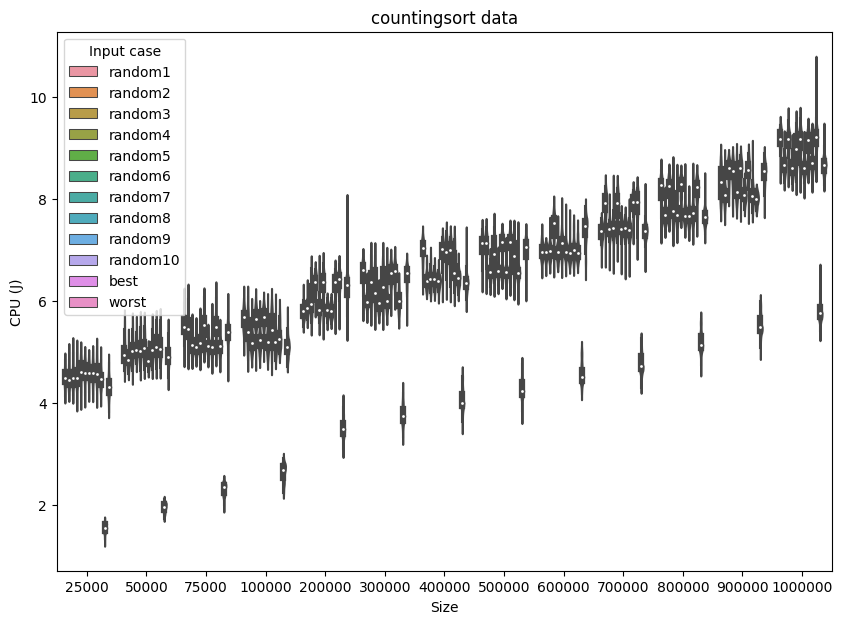

In [79]:
plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting, y = "CPU (J)", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Quicksort data'}, xlabel='Size', ylabel='Time (ms)'>

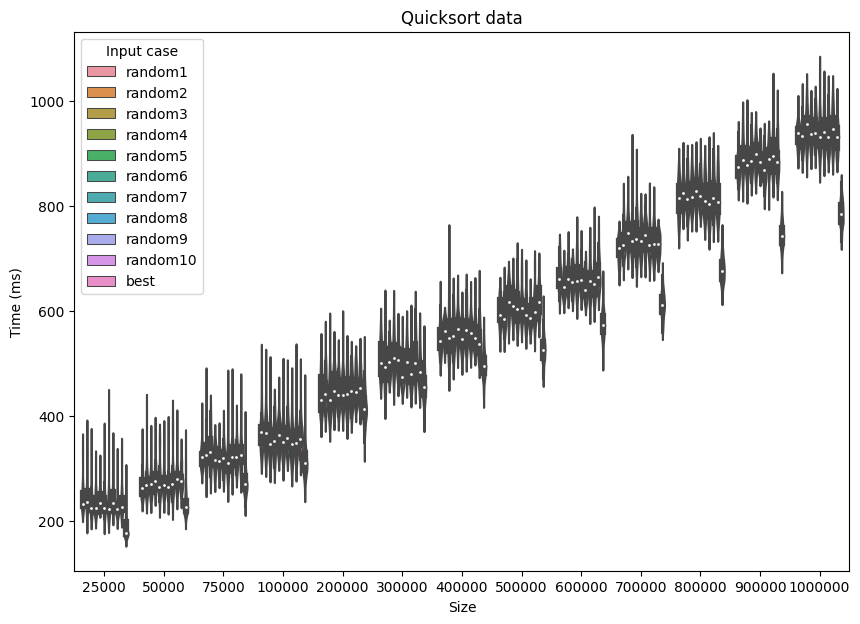

In [80]:
plt.figure(figsize=(10,7))
plt.title("Quicksort data")
sns.violinplot(data = dfQuickSort[dfQuickSort["Input case"] != "worst"], y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

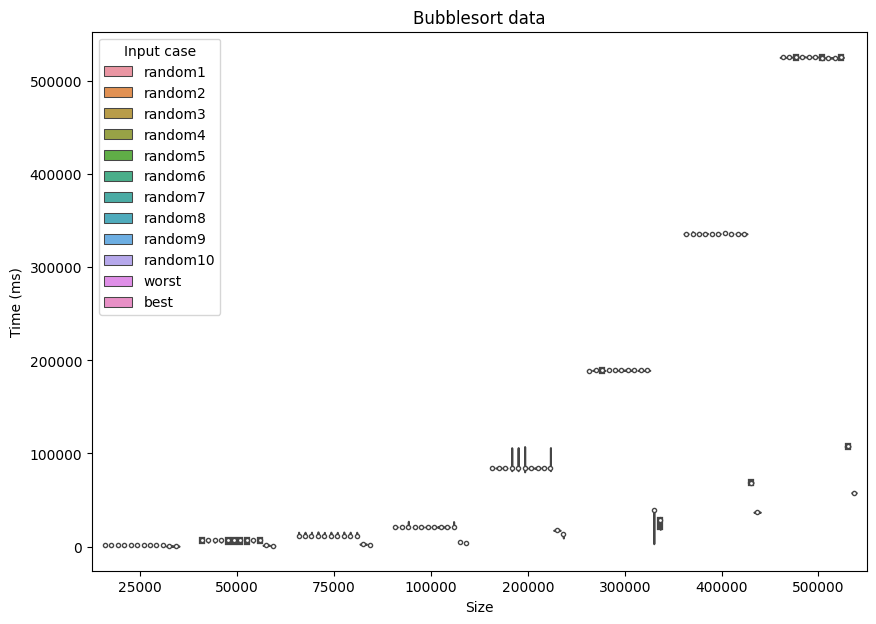

In [81]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort, y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='Time (ms)'>

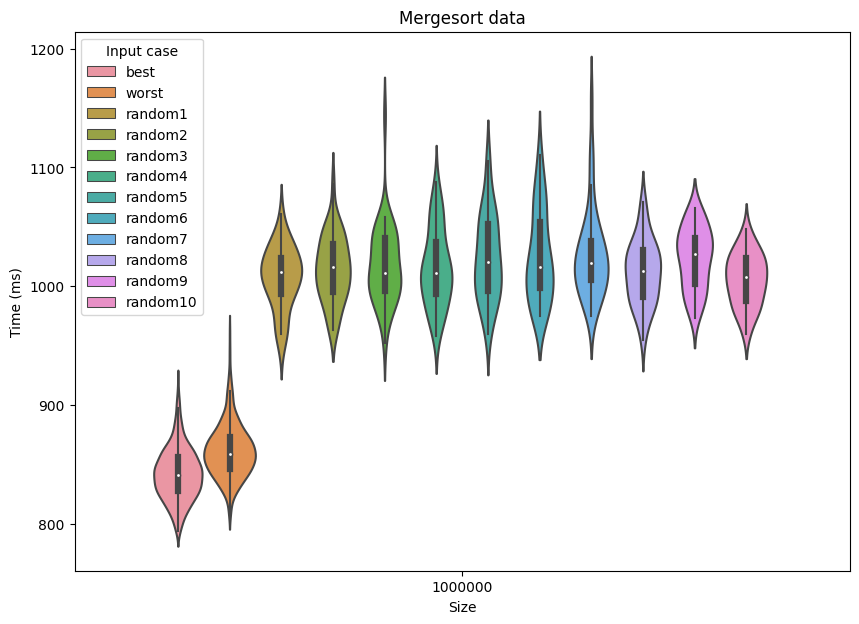

In [82]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data")
sns.violinplot(data = dfMergeSort[dfMergeSort["Size"] == "1000000"], y = "Time (ms)", x = "Size", hue ="Input case")

## ReadCSV subtracted from data PLOTS

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU - BG'>

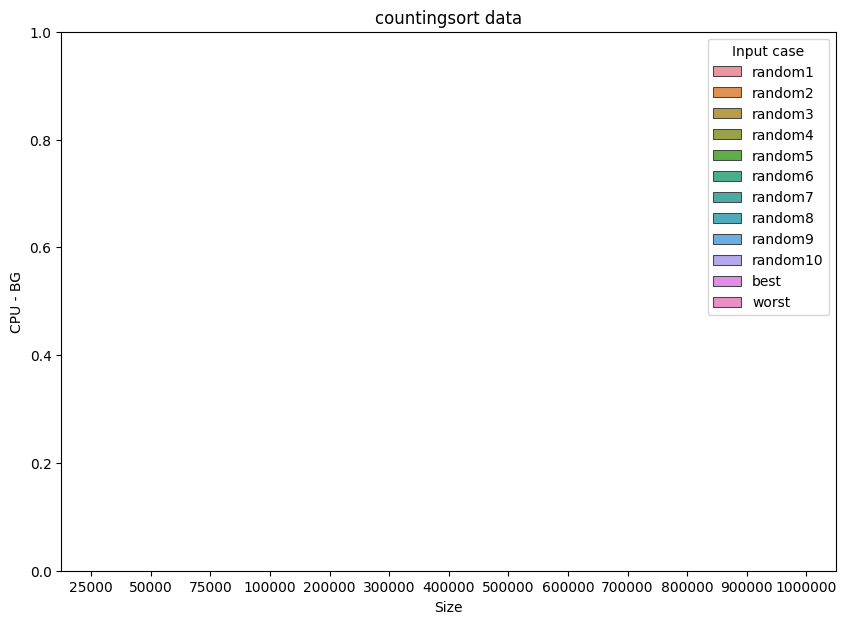

In [83]:
plt.figure(figsize=(10,7))
plt.title("countingsort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfCounting, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

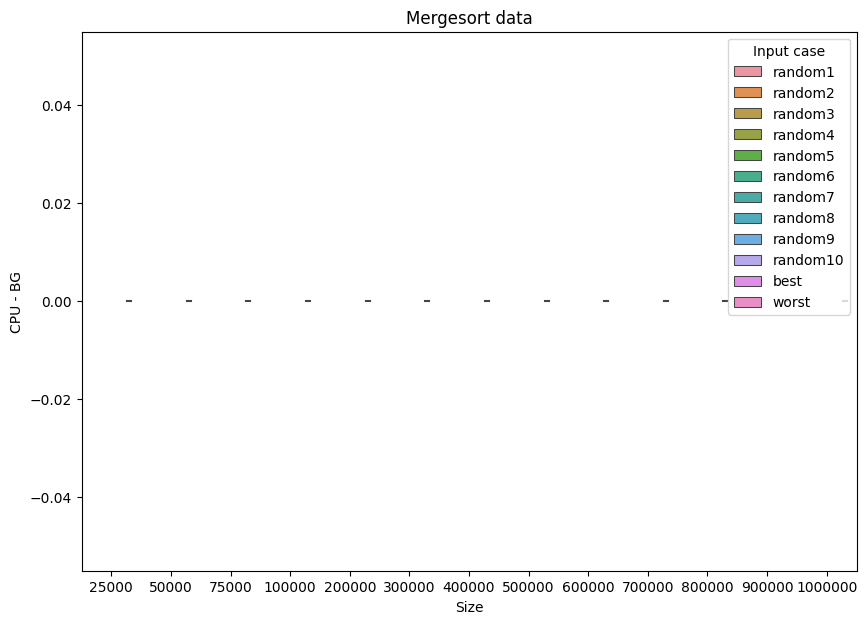

In [84]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfMergeSort, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

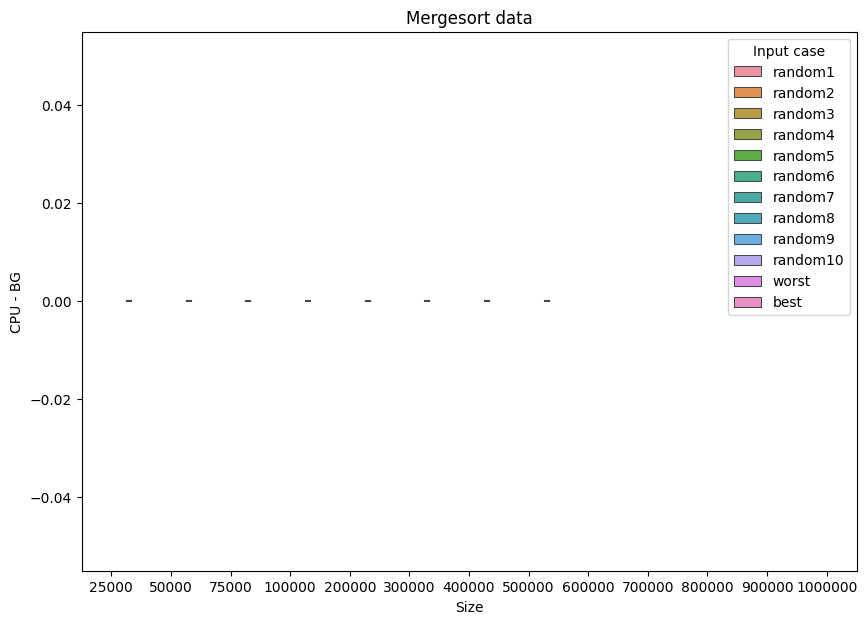

In [85]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfQuickSort, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

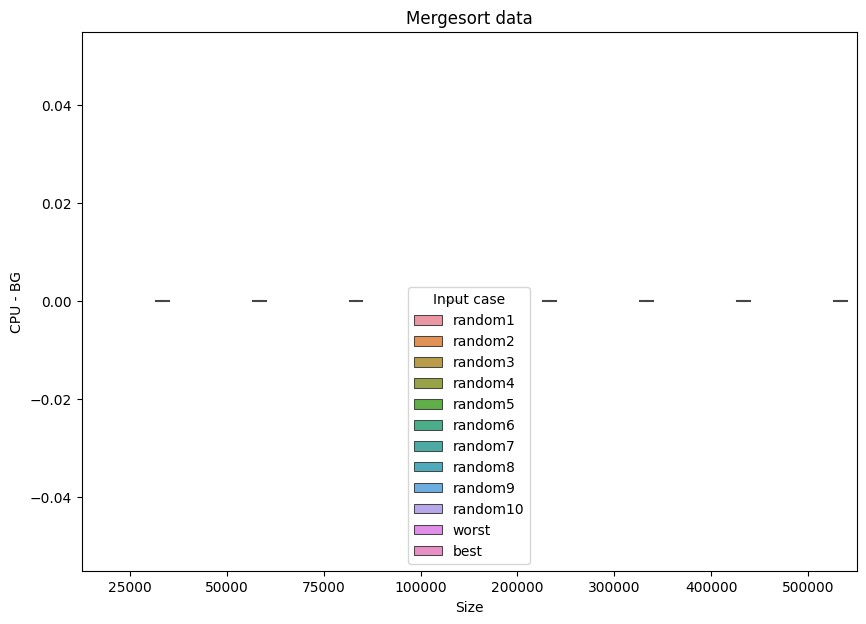

In [86]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfBubbleSort, y = "CPU - BG", x = "Size", hue = "Input case")

## AVG for each computer


#### Mergesort


In [87]:
merge16 = pd.read_csv("Results16/mergeSort-PC16.csv")
merge16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
merge21 = pd.read_csv("Results21/mergeSort-PC21.csv")
merge21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
merge23 = pd.read_csv("Results23/mergeSort-PC23.csv") 
merge23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
merge6 = pd.read_csv("Results6/mergeSort-PC6.csv")
merge6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


readCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
readCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
readCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
readCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
readCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

In [88]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

merge21 = removeNonsense(merge21)
merge16 = removeNonsense(merge16)
merge23 = removeNonsense(merge23)
merge6 = removeNonsense(merge6)


readCSV21 = removeNonsense(readCSV21)
readCSV16 = removeNonsense(readCSV16)
readCSV23 = removeNonsense(readCSV23)
readCSV6 = removeNonsense(readCSV6)
readCSV16


Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  \
0       readCSV-Random1-25000  2.240601  1.966187            0.134399   
1       readCSV-Random1-25000  2.062317  1.775085            0.126160   
2       readCSV-Random1-25000  2.140869  1.876709            0.121887   
3       readCSV-Random1-25000  2.217102  1.940735            0.133545   
4       readCSV-Random1-25000  2.058533  1.796814            0.119385   
...                       ...       ...       ...     ...         ...   
41594  readCSV-Sorted-1000000  7.584045  6.620728            0.382446   
41595  readCSV-Sorted-1000000  7.647522  6.666382            0.386780   
41596  readCSV-Sorted-1000000  7.715393  6.740112            0.386230   
41597  readCSV-Sorted-1000000  7.573486  6.611694            0.383301   
41598  readCSV-Sorted-1000000  7.495056  6.534302            0.386780   

       Temperature  Time (ms)  
0               53    227.880  
1               53    250.212  
2               53    222.526  
3               53    226.620  
4               53    219.516  
...            ...        ...  
41594           69    805.509  
41595           69    817.192  
41596           70    828.109  
41597           70    816.762  
41598           71    784.613  

[41599 rows x 7 columns]

In [89]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l
makeinputColumn(merge21)
makeinputColumn(merge23)
makeinputColumn(merge6)
makeinputColumn(merge16)
print(merge21)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(readCSV16)
makeinputColumn_readCSV(readCSV21)
makeinputColumn_readCSV(readCSV23)
makeinputColumn_readCSV(readCSV6)

                Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  \
0         random1-25000-1  2.177551  1.915771            0.124634   
1         random1-25000-1  2.264099  1.966980            0.127747   
2         random1-25000-1  2.299500  2.023010            0.132385   
3         random1-25000-1  2.221680  1.955933            0.125977   
4         random1-25000-1  2.310669  2.044495            0.135010   
...                   ...       ...       ...     ...         ...   
18794  random10-1000000-1  9.380371  8.229370            0.487854   
18795  random10-1000000-1  9.269836  8.080017            0.477905   
18796  random10-1000000-1  9.450195  8.304504            0.479492   
18797  random10-1000000-1  9.257446  8.093933            0.468750   
18798  random10-1000000-1  9.308594  8.168518            0.479248   

       Temperature  Time (ms) Input case  
0               37    218.379    random1  
1               37    225.000    random1  
2               37    230.502    random1  

In [90]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(merge21)
makeSizecolumn(merge23)
makeSizecolumn(merge6)
makeSizecolumn(merge16)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(readCSV16)
makeSizecolumn_readCSV(readCSV21)
makeSizecolumn_readCSV(readCSV23)
makeSizecolumn_readCSV(readCSV6)

In [91]:
merge16


Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  \
0         random1-25000-1  2.086792  1.796448            0.131958   
1         random1-25000-1  2.237671  1.952087            0.138672   
2         random1-25000-1  2.227417  1.941711            0.142029   
3         random1-25000-1  2.227234  1.935608            0.140259   
4         random1-25000-1  2.076599  1.804749            0.129883   
...                   ...       ...       ...     ...         ...   
18794  random10-1000000-1  8.915527  7.729553            0.477112   
18795  random10-1000000-1  9.108032  7.892151            0.495239   
18796  random10-1000000-1  8.649841  7.518066            0.475403   
18797  random10-1000000-1  8.933716  7.770569            0.468750   
18798  random10-1000000-1  8.945007  7.760620            0.487488   

       Temperature  Time (ms) Input case     Size  
0               38    247.946    random1    25000  
1               38    234.279    random1    25000  
2               38    237.194    random1    25000  
3               38    232.236    random1    25000  
4               38    227.670    random1    25000  
...            ...        ...        ...      ...  
18794           68   1024.890   random10  1000000  
18795           68   1035.310   random10  1000000  
18796           67    962.433   random10  1000000  
18797           67   1000.870   random10  1000000  
18798           67    996.839   random10  1000000  

[18799 rows x 9 columns]

In [169]:
def remove_outliers(df, type, size):
    q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] >= LF]

    q1 = df[df["Input case"] == type][df["Size"]==size]["Time (ms)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["Time (ms)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["Time (ms)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["Time (ms)"] >= LF]

    q1 = df[df["Input case"] == type][df["Size"]==size]["Memory (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["Memory (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["Memory (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["Memory (J)"] >= LF]

    
    q1 = df[df["Input case"] == type][df["Size"]==size]["PKG (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["PKG (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["PKG (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["PKG (J)"] >= LF]


In [170]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    for case in range(len(c)):
        for size in range(len(s)):
            remove_outliers(df, c[case], s[size])
remove_outliers_for_pc(merge16)
remove_outliers_for_pc(merge6)
remove_outliers_for_pc(merge21)
remove_outliers_for_pc(merge23)

remove_outliers_for_pc(readCSV16)
remove_outliers_for_pc(readCSV6)
remove_outliers_for_pc(readCSV21)
remove_outliers_for_pc(readCSV23)

C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2221185627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2221185627.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2221185627.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]


For size, case: 25000,best. Lower fence: 1.611419677734375 Upper fence: 2.041107177734375.
For size, case: 25000,best. Lower fence: 180.56887500000002 Upper fence: 258.877875.
For size, case: 25000,best. Lower fence: 0.11203765869140625 Upper fence: 0.14298248291015625.
For size, case: 25000,best. Lower fence: 1.9380645751953125 Upper fence: 2.3205108642578125.
For size, case: 50000,best. Lower fence: 2.0044403076171875 Upper fence: 2.5472869873046875.
For size, case: 50000,best. Lower fence: 216.54824999999994 Upper fence: 300.69425.
For size, case: 50000,best. Lower fence: 0.1414947509765625 Upper fence: 0.1777496337890625.
For size, case: 50000,best. Lower fence: 2.427825927734375 Upper fence: 2.872406005859375.
For size, case: 75000,best. Lower fence: 2.429351806640625 Upper fence: 3.247344970703125.
For size, case: 75000,best. Lower fence: 259.18450000000007 Upper fence: 358.3885.
For size, case: 75000,best. Lower fence: 0.161041259765625 Upper fence: 0.231109619140625.
For size, 

In [136]:
def meanData(df,type,size):
    mean = df[df["Input case"] == type][df["Size"]==size].mean()
    mean["Input case"] = type
    return mean

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    df_of_means = []
    #df_of_means = pd.DataFrame({
    #    "Size":[],
    #    "Input case":[]                        can name a series to solve this error or make df_of_means a list of series 
    #})
    for case in range(len(c)):
        for size in range(len(s)):
            df_of_means.append(meanData(df, c[case], s[size]))   
    return df_of_means


mean16 = mean_of_dataset(merge16)
mean21 = mean_of_dataset(merge21)
mean23 = mean_of_dataset(merge23)
mean6 = mean_of_dataset(merge6)

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    list_of_means = []
    for case in range(len(c)):
        for size in range(len(s)):
            list_of_means.append(meanData(df, c[case], s[size]))   
    return list_of_means

mean16_readCSV = mean_of_dataset_readCSV(readCSV16)
mean21_readCSV = mean_of_dataset_readCSV(readCSV21)
mean23_readCSV = mean_of_dataset_readCSV(readCSV23)
mean6_readCSV = mean_of_dataset_readCSV(readCSV6)

C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2586777890.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2586777890.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2586777890.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\2586777890.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only

In [137]:
print(mean16_readCSV)

[PKG (J)          2.147885
CPU (J)           1.87053
Memory (J)       0.129033
Temperature          54.0
Time (ms)      234.479641
Size              25000.0
Input case        random1
dtype: object, PKG (J)          2.499942
CPU (J)          2.162758
Memory (J)       0.150826
Temperature          57.2
Time (ms)      268.900725
Size              50000.0
Input case        random1
dtype: object, PKG (J)          3.068246
CPU (J)          2.670992
Memory (J)       0.180057
Temperature          61.0
Time (ms)      311.495875
Size              75000.0
Input case        random1
dtype: object, PKG (J)          3.545004
CPU (J)          3.090067
Memory (J)       0.208476
Temperature        63.525
Time (ms)      351.659225
Size             100000.0
Input case        random1
dtype: object, PKG (J)          4.166064
CPU (J)          3.626851
Memory (J)       0.233299
Temperature        65.425
Time (ms)      420.754475
Size             200000.0
Input case        random1
dtype: object, PKG (J)       

In [138]:
mean16

[PKG (J)         2.122595
 CPU (J)         1.821378
 Memory (J)      0.128641
 Temperature      70.2225
 Time (ms)      223.01451
 Size             25000.0
 Input case          best
 dtype: object,
 PKG (J)          2.629736
 CPU (J)          2.269795
 Memory (J)       0.160134
 Temperature        71.025
 Time (ms)      263.092973
 Size              50000.0
 Input case           best
 dtype: object,
 PKG (J)          3.254238
 CPU (J)          2.822791
 Memory (J)       0.196155
 Temperature       72.7025
 Time (ms)      312.049368
 Size              75000.0
 Input case           best
 dtype: object,
 PKG (J)          3.758553
 CPU (J)          3.264051
 Memory (J)        0.22477
 Temperature       73.9225
 Time (ms)      356.739778
 Size             100000.0
 Input case           best
 dtype: object,
 PKG (J)          4.782303
 CPU (J)          4.158725
 Memory (J)       0.278044
 Temperature         75.53
 Time (ms)      447.942728
 Size             200000.0
 Input case           bes

In [139]:
def makeCPU_sub_readCSV(inList):
    for i in range(len(inList)):
        case = inList[i]["Input case"]
        if case == "best":
            case = "sorted"
        if case == "worst":
            case = "mergeworst"
        size = inList[i]["Size"]
        inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
        inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
        inList[i]["Memory - readCSV"] = inList[i]["Memory (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Memory (J)"]

makeCPU_sub_readCSV(mean16)
makeCPU_sub_readCSV(mean21)
makeCPU_sub_readCSV(mean23)
makeCPU_sub_readCSV(mean6)

C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\1512067854.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\1512067854.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
C:\Users\Kristina\AppData\Local\Temp\ipykernel_8516\1512067854.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
C

In [140]:
readCSV16[readCSV16["Input case"] == "mergeworst"]



Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  \
20799    readCSV-MergeWorst-25000  2.199402  1.880493            0.126343   
20800    readCSV-MergeWorst-25000  1.989990  1.713257            0.109680   
20801    readCSV-MergeWorst-25000  1.919128  1.632080            0.111450   
20802    readCSV-MergeWorst-25000  1.975647  1.684753            0.113342   
20803    readCSV-MergeWorst-25000  1.967773  1.694580            0.110352   
...                           ...       ...       ...     ...         ...   
25994  readCSV-MergeWorst-1000000  7.407043  6.469543            0.385559   
25995  readCSV-MergeWorst-1000000  7.461426  6.499390            0.393188   
25996  readCSV-MergeWorst-1000000  7.553223  6.570374            0.398193   
25997  readCSV-MergeWorst-1000000  7.460754  6.468506            0.393677   
25998  readCSV-MergeWorst-1000000  8.055176  6.993835            0.458313   

       Temperature  Time (ms)  Input case     Size  
20799           69    215.151  mergeworst    25000  
20800           69    202.951  mergeworst    25000  
20801           69    213.856  mergeworst    25000  
20802           69    220.815  mergeworst    25000  
20803           69    203.502  mergeworst    25000  
...            ...        ...         ...      ...  
25994           69    764.147  mergeworst  1000000  
25995           70    762.825  mergeworst  1000000  
25996           70    814.121  mergeworst  1000000  
25997           69    817.478  mergeworst  1000000  
25998           69    864.955  mergeworst  1000000  

[5200 rows x 9 columns]

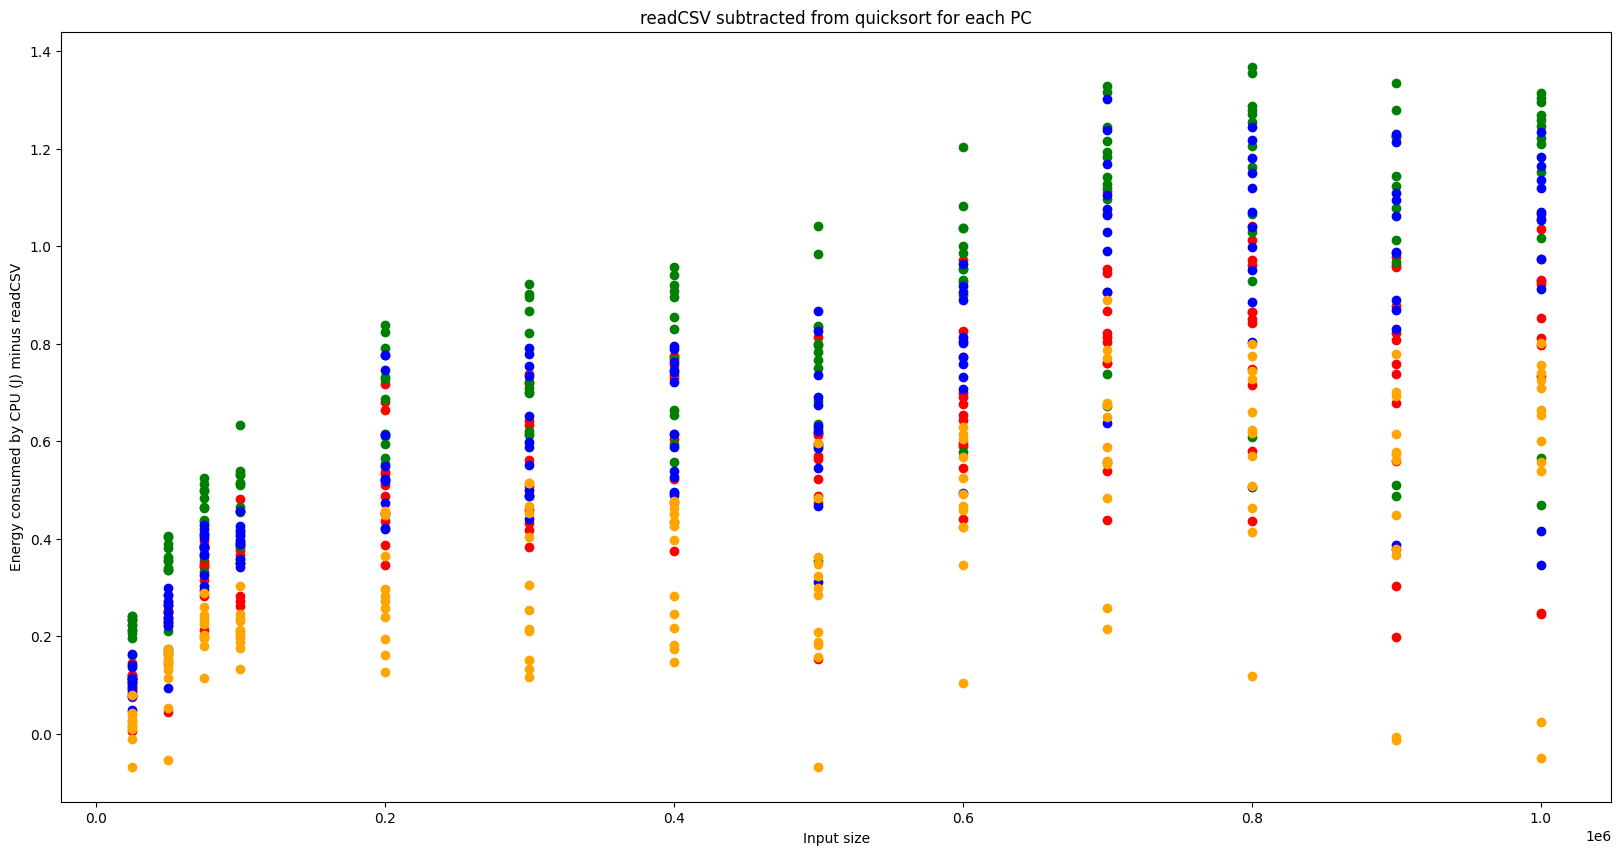

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


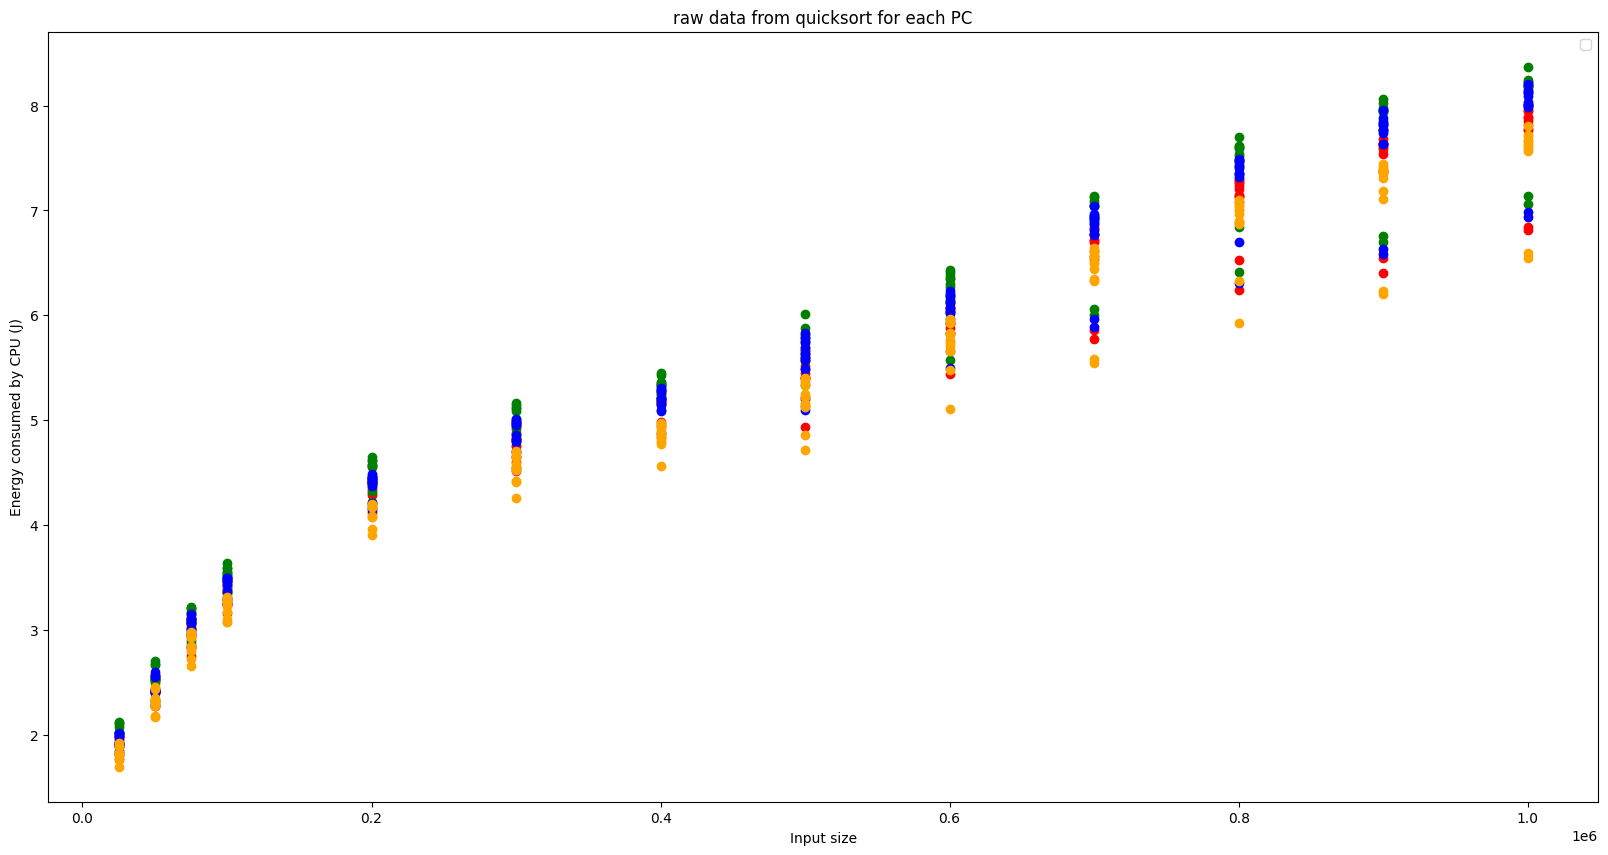

In [141]:
plt.figure(figsize=(20,10))
for i in range(len(mean16)):
    plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")
plt.title("readCSV subtracted from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(mean16)):
    plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

## Separating Cases

CPU Consumption of Best Cases on all computers 

In [142]:
mean16[1]

PKG (J)               2.629736
CPU (J)               2.269795
Memory (J)            0.160134
Temperature             71.025
Time (ms)           263.092973
Size                   50000.0
Input case                best
CPU - readCSV         0.147011
Time - readCSV        12.82013
Memory - readCSV      0.017649
dtype: object

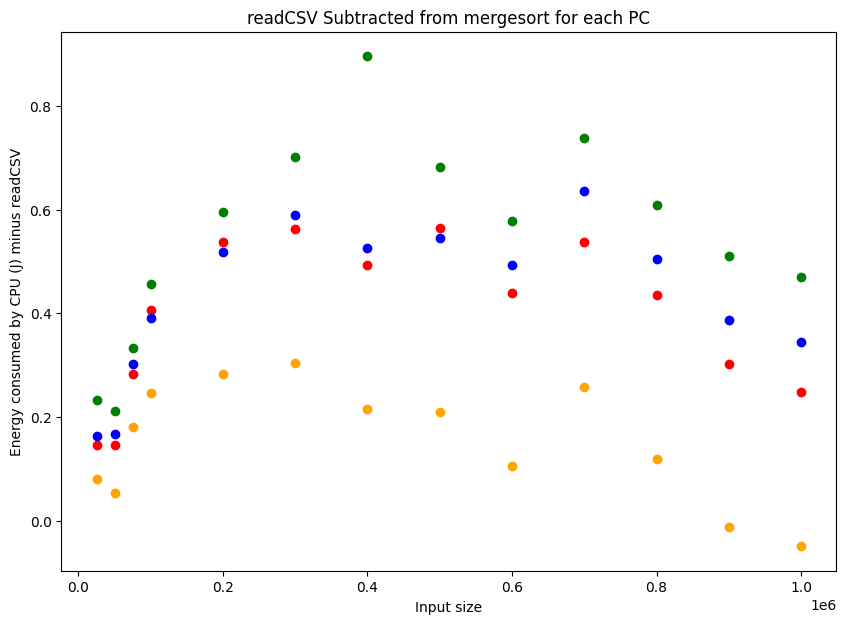

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


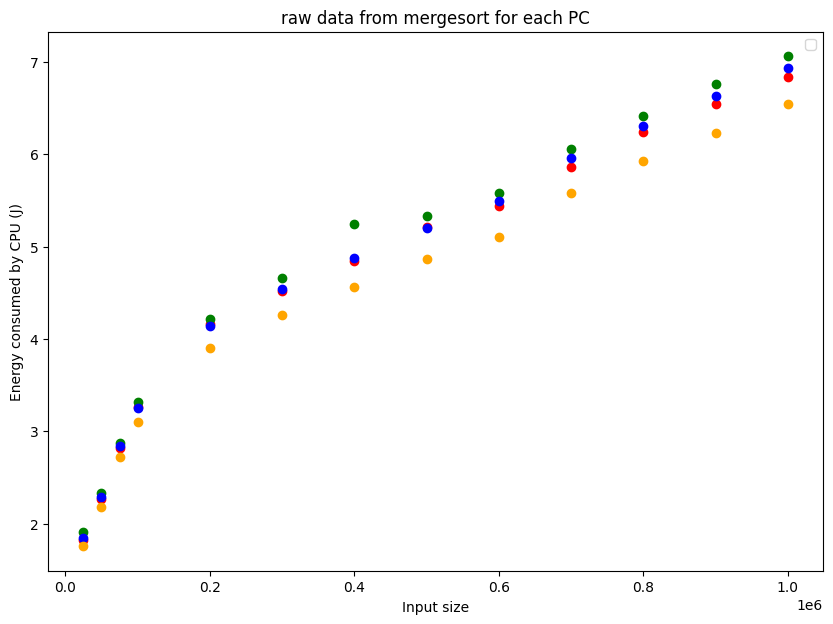

In [143]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("readCSV Subtracted from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


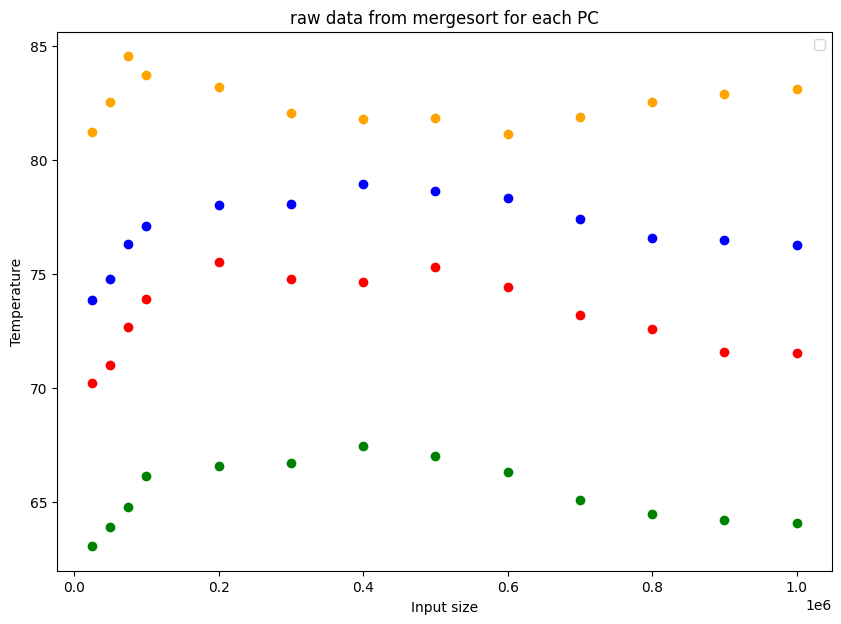

In [161]:
# plt.figure(figsize=(10,7))
# for i in range(len(mean16)):
#     if mean16[i]["Input case"] == "best":
#         plt.plot( mean16[i]["Size"],mean16[i]["Temperature - readCSV"],"o", color = "red")

# for i in range(len(mean21)):
#     if mean21[i]["Input case"] == "best":
#         plt.plot( mean21[i]["Size"],mean21[i]["Temperature - readCSV"],"o", color = "green")

# for i in range(len(mean23)):
#     if mean23[i]["Input case"] == "best":
#         plt.plot( mean23[i]["Size"],mean23[i]["Temperature - readCSV"],"o", color = "blue")

# for i in range(len(mean6)):
#     if mean6[i]["Input case"] == "best":
#         plt.plot( mean6[i]["Size"],mean6[i]["Temperature - readCSV"],"o", color = "orange")

# plt.title("readCSV Subtracted from mergesort for each PC")
# plt.xlabel("Input size")
# plt.ylabel("Temperature of Computers minus Temperature of readCSV")
# plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Temperature"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Temperature"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Temperature"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Temperature"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Time (ms) of Best Case on all Computers

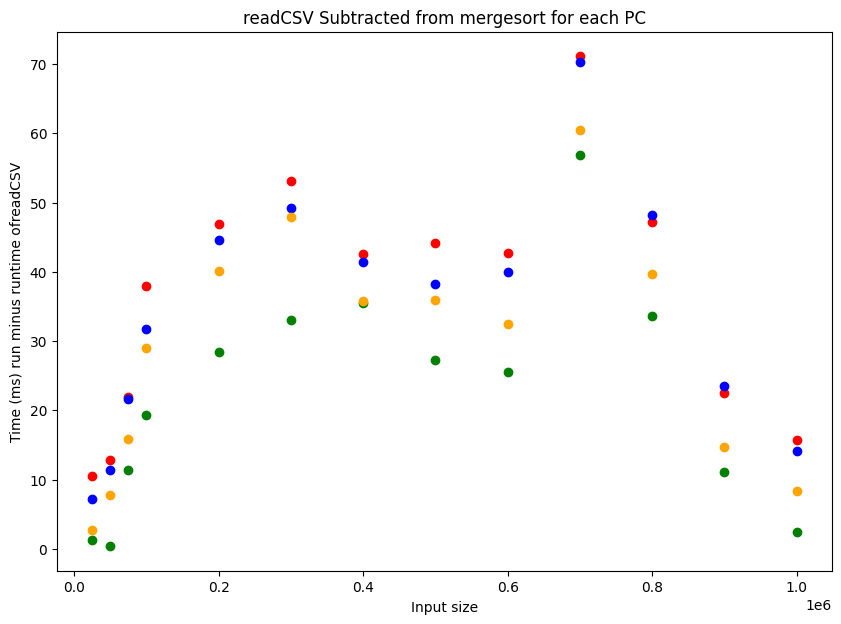

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


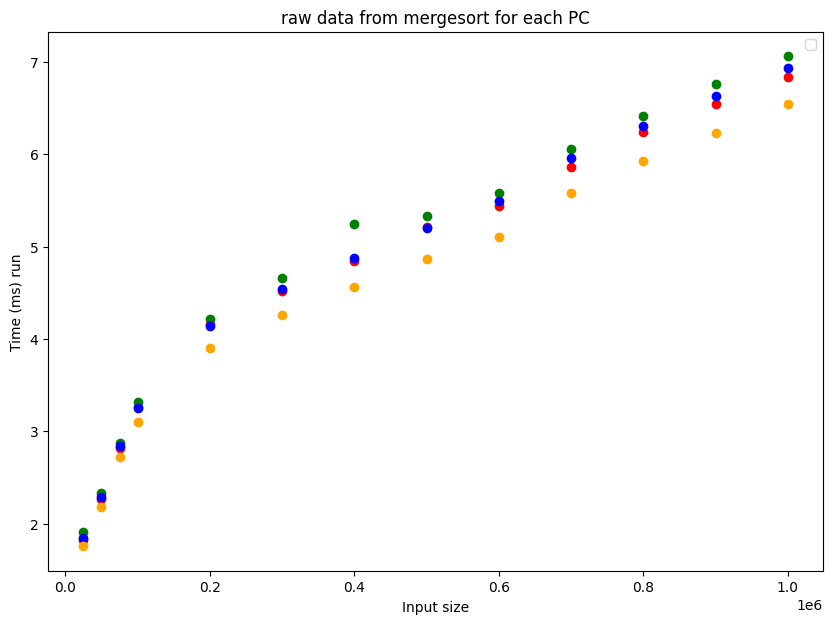

In [144]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Time - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Time - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Time - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Time - readCSV"],"o", color = "orange")

plt.title("readCSV Subtracted from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms) run minus runtime ofreadCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms) run")
plt.legend()
plt.show()

Memory Consumption of Best Case on all Computers

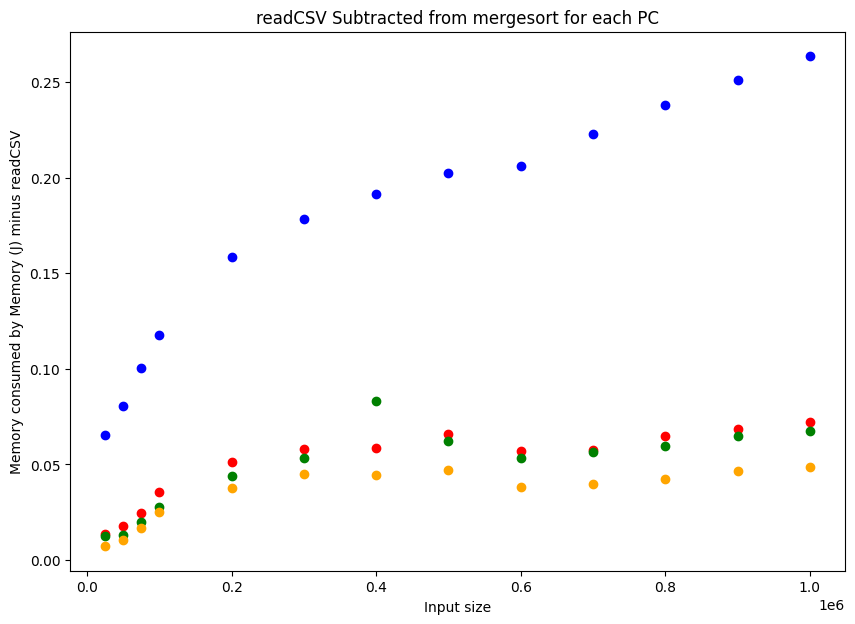

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


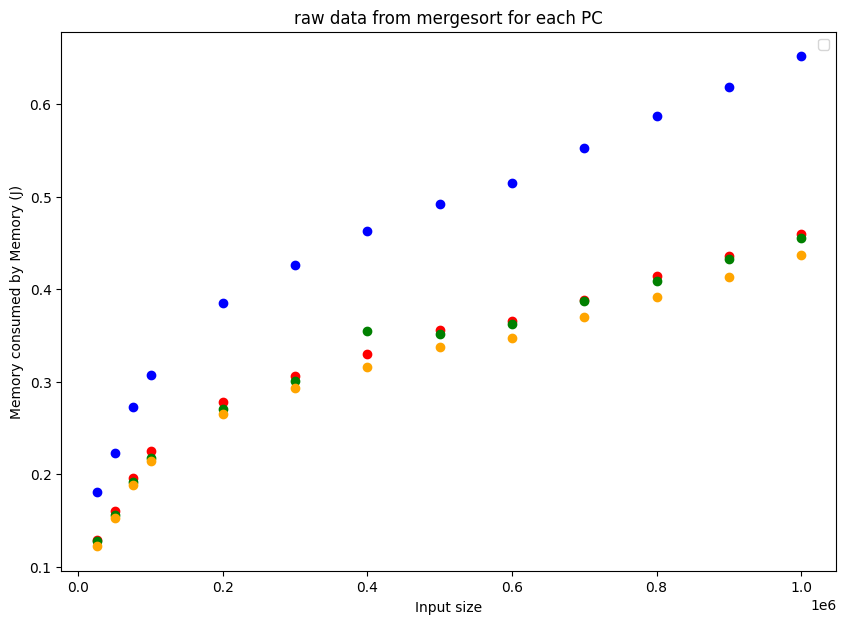

In [145]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Memory - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Memory - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Memory - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Memory - readCSV"],"o", color = "orange")

plt.title("readCSV Subtracted from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory consumed by Memory (J) minus readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Memory (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Memory (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Memory (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Memory (J)"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory consumed by Memory (J)")
plt.legend()
plt.show()

Energy vs Time

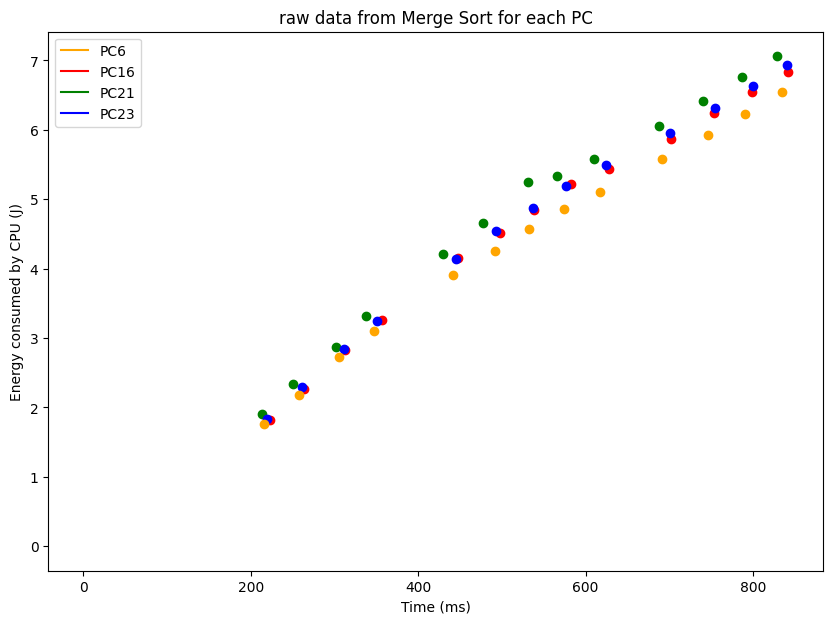

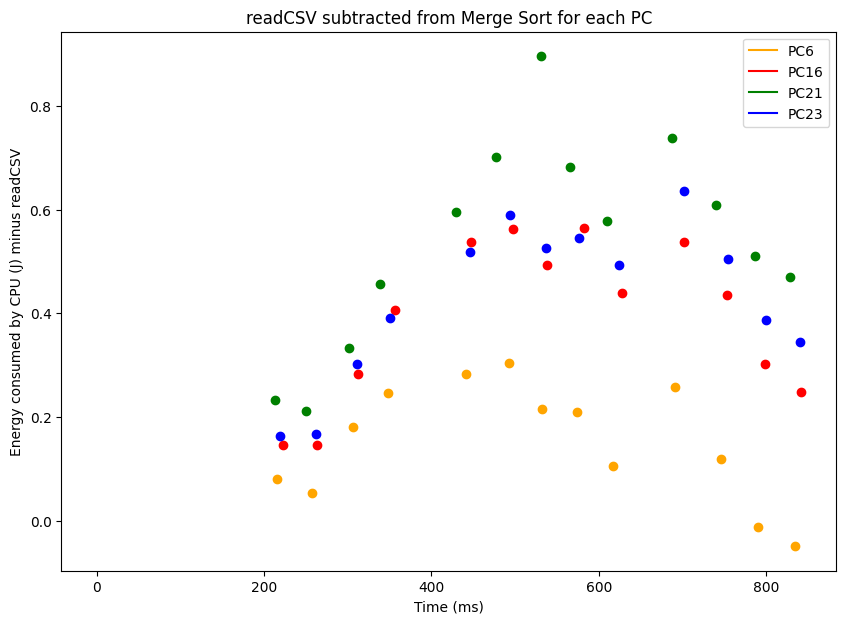

In [171]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU (J)"],"o", color = "orange")

plt.plot(0, 0, color = "orange", label='PC6')
plt.plot(0, 0, color = "red", label='PC16')
plt.plot(0, 0, color = "green", label='PC21')
plt.plot(0, 0, color = "blue", label='PC23')
plt.title("raw data from Merge Sort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.plot(0, 0, color = "orange", label='PC6')
plt.plot(0, 0, color = "red", label='PC16')
plt.plot(0, 0, color = "green", label='PC21')
plt.plot(0, 0, color = "blue", label='PC23')
plt.title("readCSV subtracted from Merge Sort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.legend()
plt.show()

CPU Consumption of Worst Case on all Cmputers

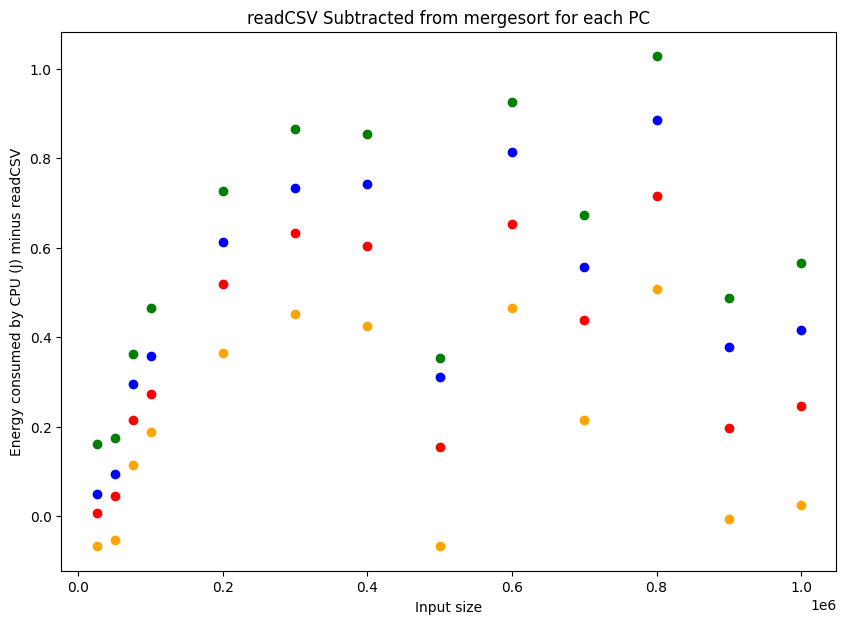

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


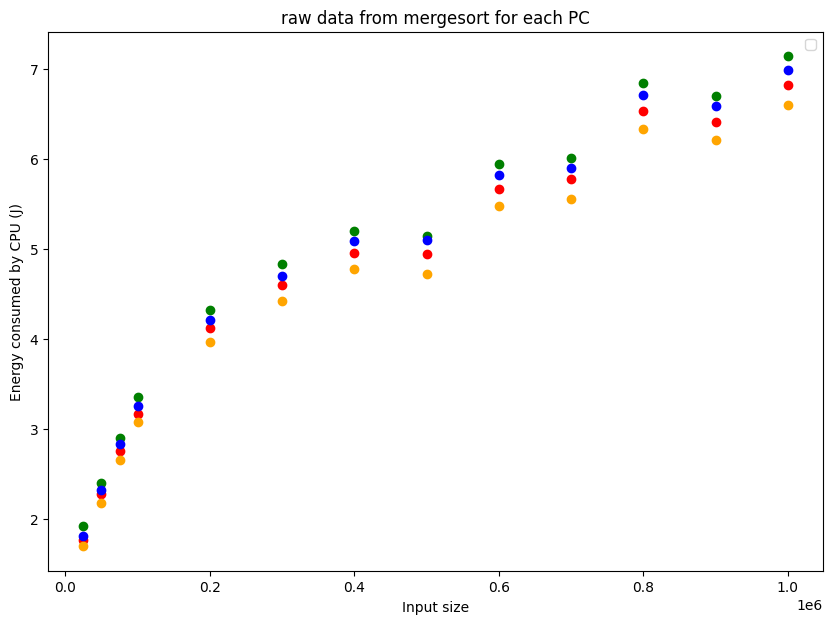

In [146]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("readCSV Subtracted from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

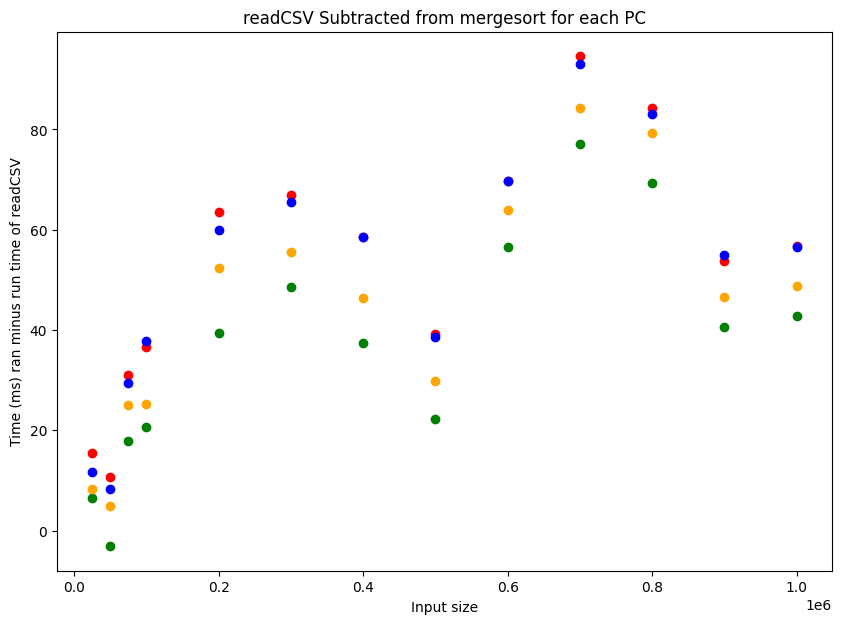

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


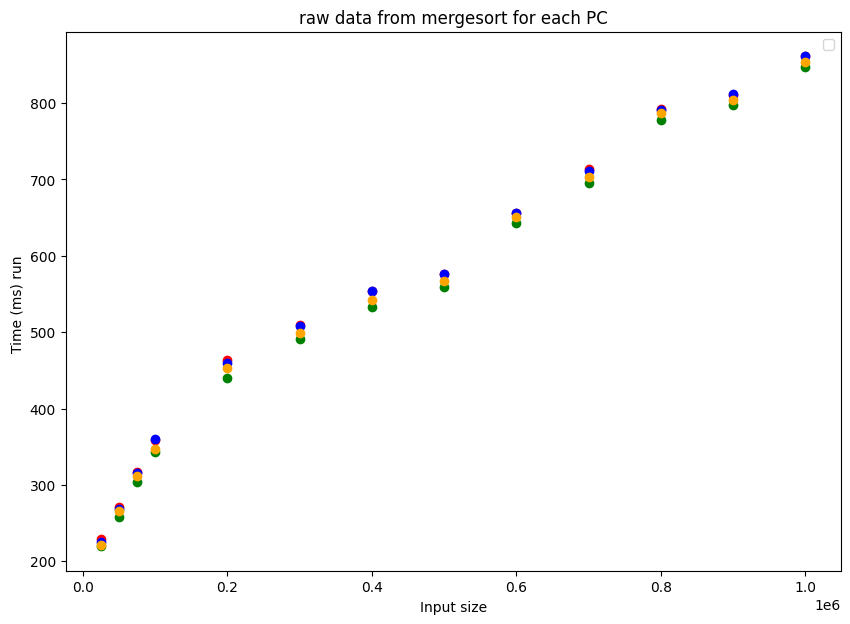

In [147]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Time - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Time - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Time - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Time - readCSV"],"o", color = "orange")

plt.title("readCSV Subtracted from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms) ran minus run time of readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Time (ms)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Time (ms)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Time (ms)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Time (ms)"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms) run ")
plt.legend()
plt.show()

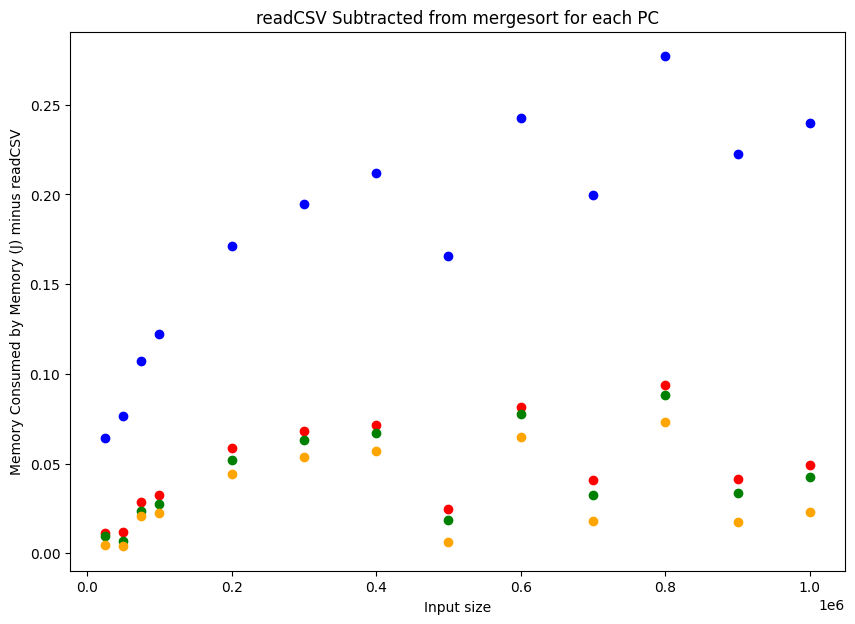

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


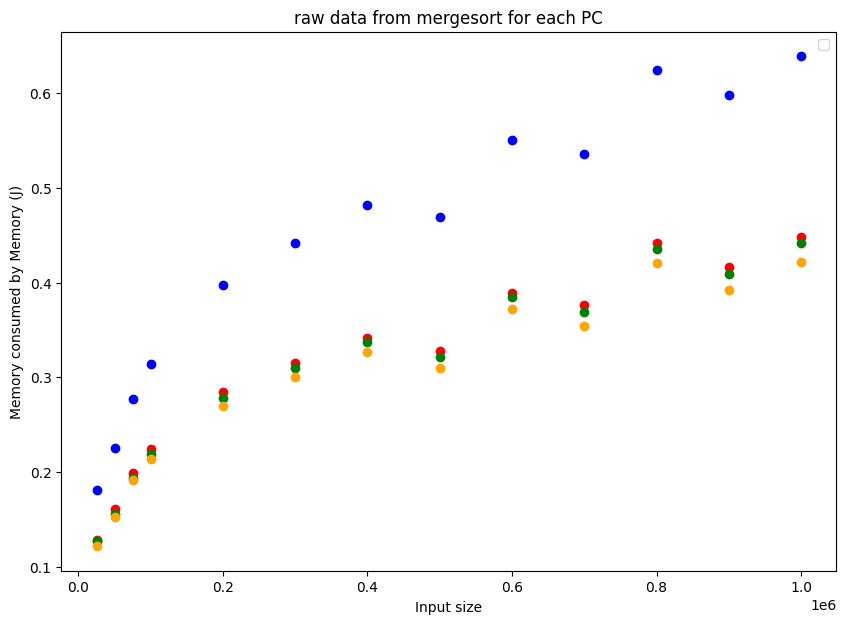

In [148]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Memory - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Memory - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Memory - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Memory - readCSV"],"o", color = "orange")

plt.title("readCSV Subtracted from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory Consumed by Memory (J) minus readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Memory (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Memory (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Memory (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Memory (J)"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory consumed by Memory (J)")
plt.legend()
plt.show()

Temperature of Worst Case on all Computers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


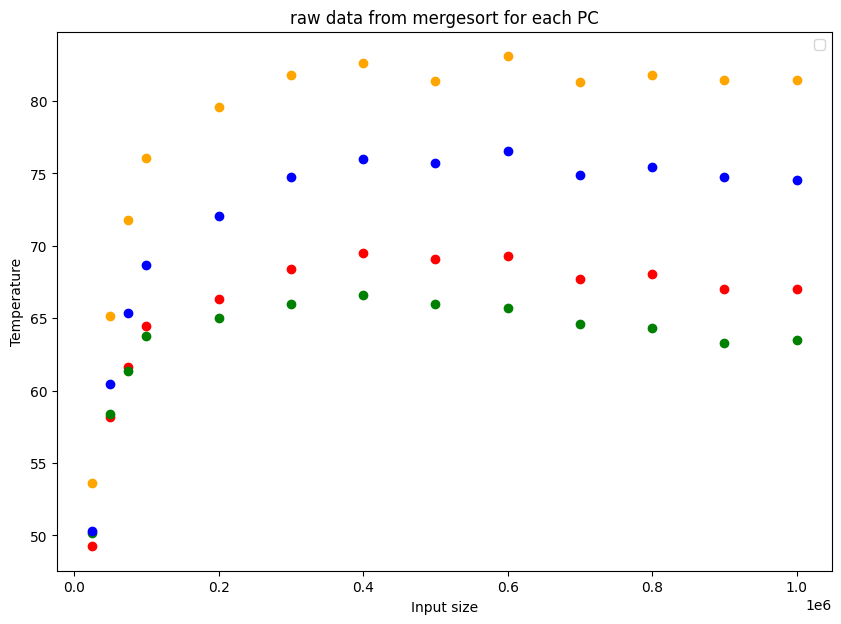

In [164]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Temperature"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Temperature"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Temperature"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Temperature"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Energy vs Time 

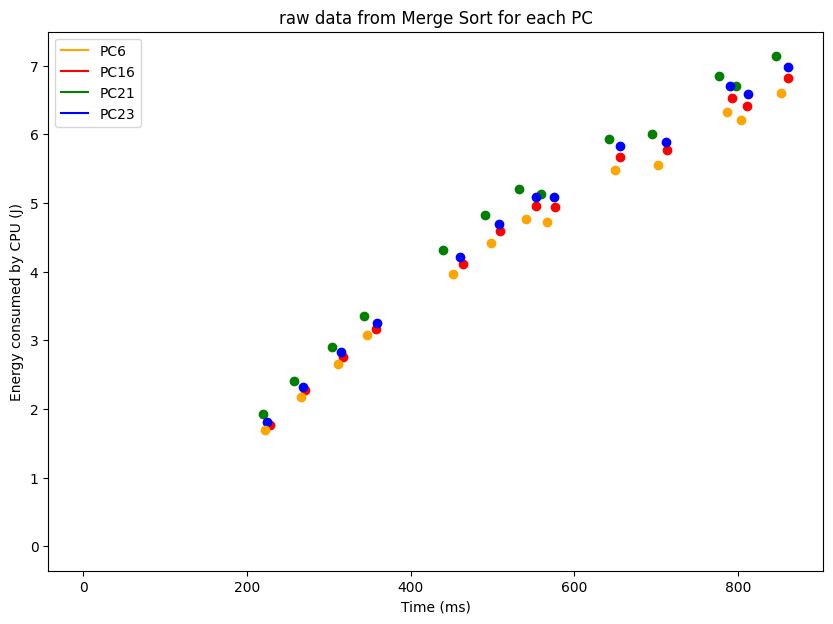

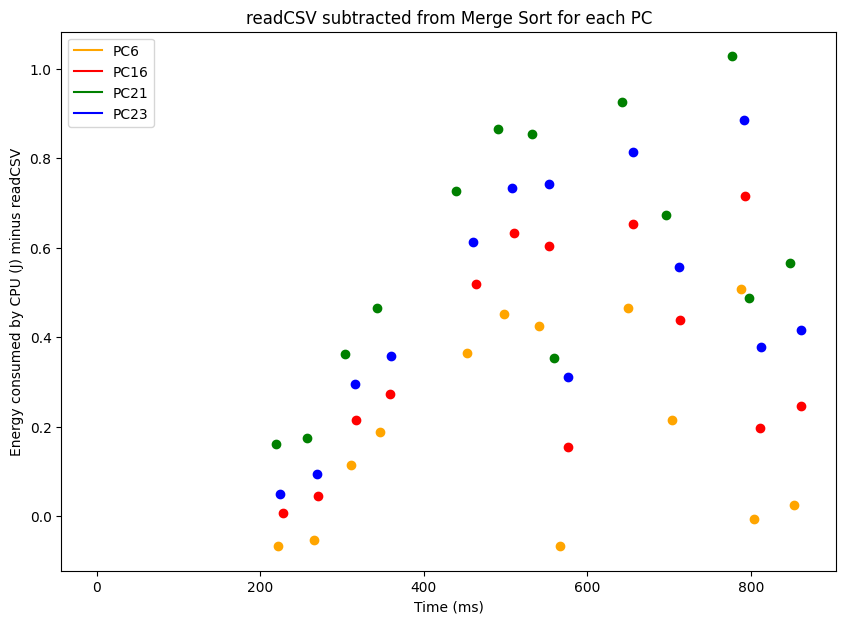

In [172]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU (J)"],"o", color = "orange")

plt.plot(0, 0, color = "orange", label='PC6')
plt.plot(0, 0, color = "red", label='PC16')
plt.plot(0, 0, color = "green", label='PC21')
plt.plot(0, 0, color = "blue", label='PC23')
plt.title("raw data from Merge Sort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.plot(0, 0, color = "orange", label='PC6')
plt.plot(0, 0, color = "red", label='PC16')
plt.plot(0, 0, color = "green", label='PC21')
plt.plot(0, 0, color = "blue", label='PC23')
plt.title("readCSV subtracted from Merge Sort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.legend()
plt.show()

CPU of Random Case on all Computer 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


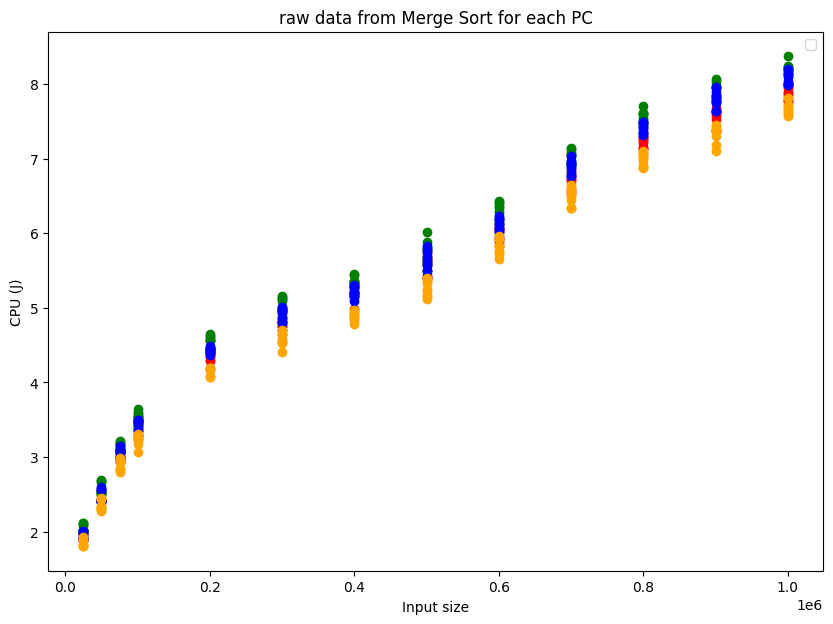

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


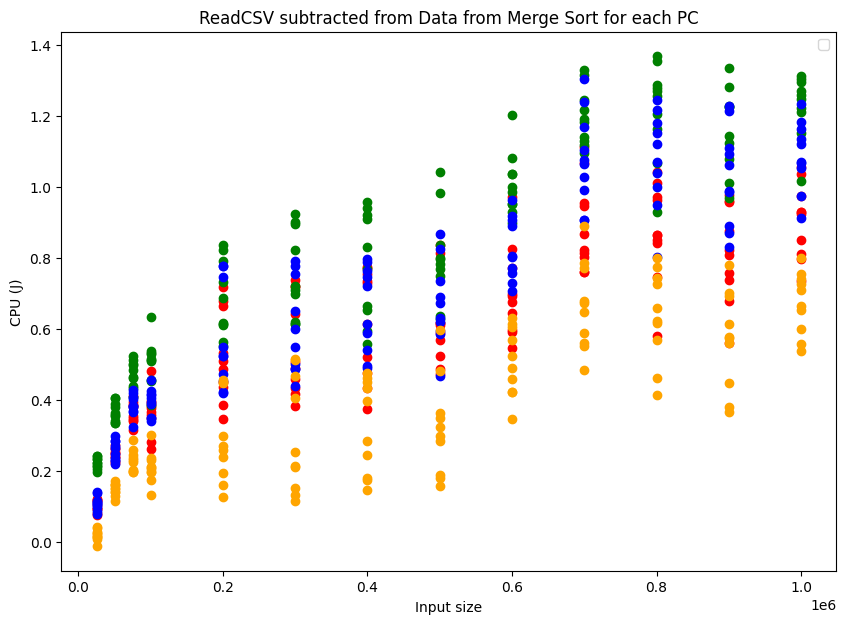

In [167]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from Merge Sort for each PC")
plt.xlabel("Input size")
plt.ylabel("CPU (J)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
for i in range (len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")
plt.title("ReadCSV subtracted from Data from Merge Sort for each PC")
plt.xlabel("Input size")
plt.ylabel("CPU (J)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


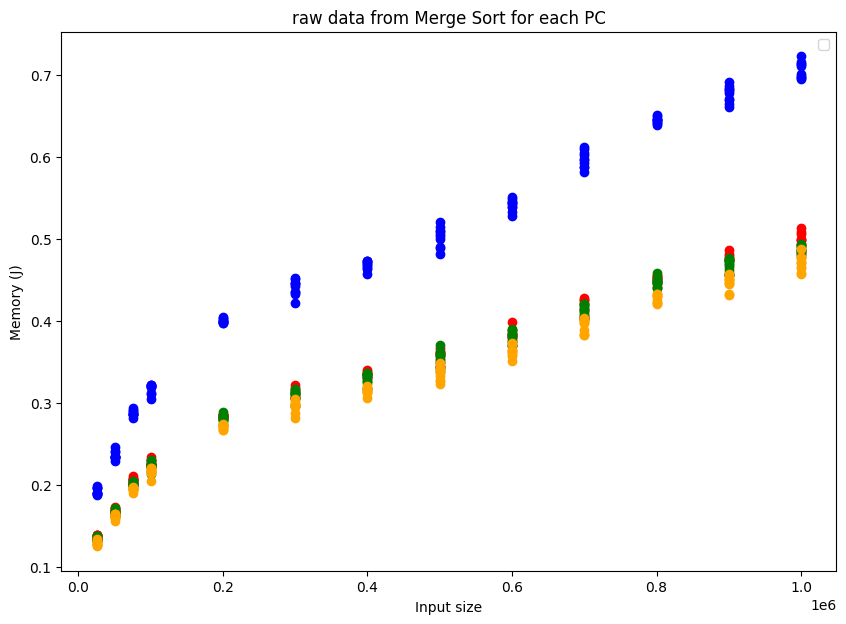

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


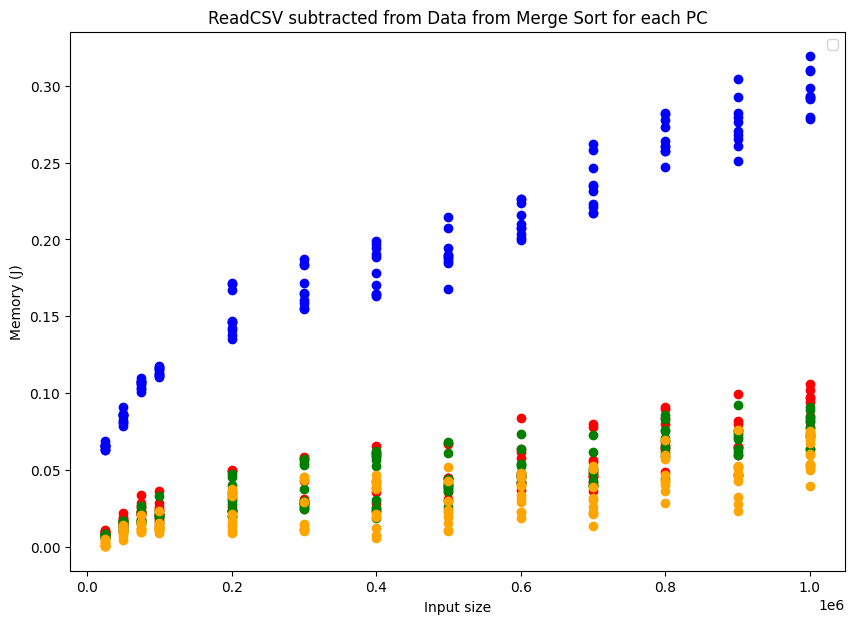

In [154]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Memory (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Memory (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Memory (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Memory (J)"],"o", color = "orange")
plt.title("raw data from Merge Sort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory (J)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Memory - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Memory - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Memory - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Memory - readCSV"],"o", color = "orange")
plt.title("ReadCSV subtracted from Data from Merge Sort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory (J)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


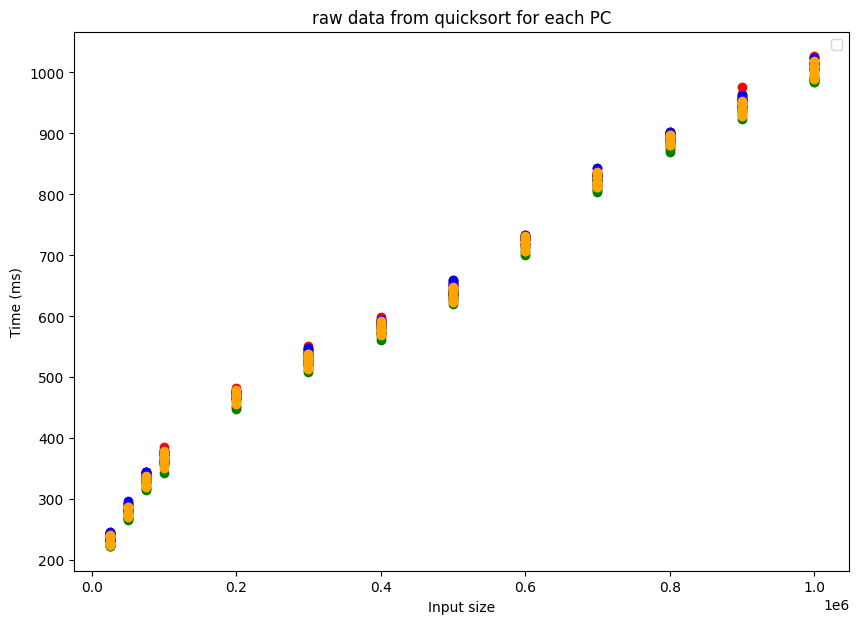

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


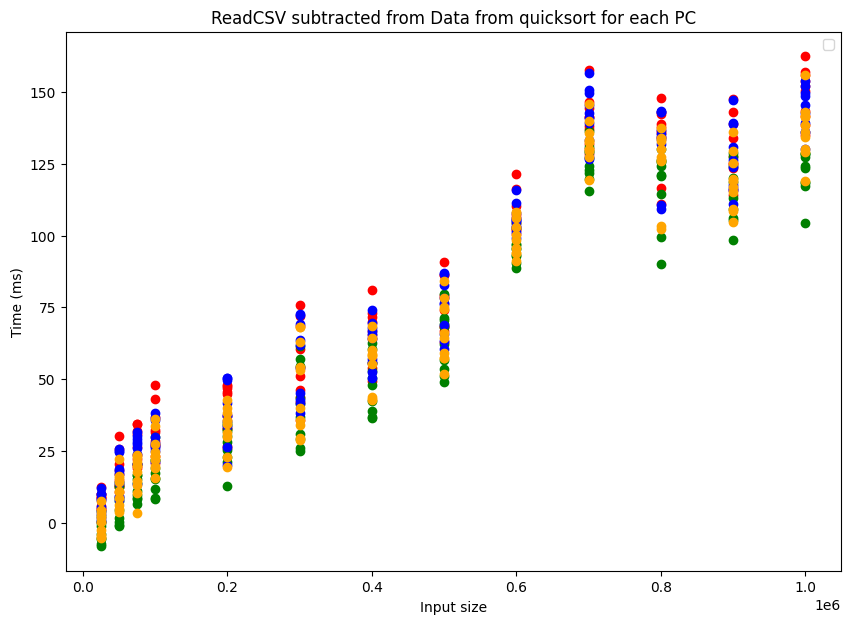

In [151]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Time (ms)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Time (ms)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Time (ms)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Time (ms)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Time - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Time - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Time - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Time - readCSV"],"o", color = "orange")
plt.title("ReadCSV subtracted from Data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

In [160]:
plt.figure(figsize=(10,7))


for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU  + Memory "],"o", color = "blue")

plt.title("raw data from Merge Sort for each PC")
plt.xlabel("Input size")
plt.ylabel("CPU (J) + Memory (J)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU  + Memory  - readCSV"],"o", color = "blue")

plt.title("ReadCSV subtracted from Data from Merge Sort for each PC")
plt.xlabel("Input size")
plt.ylabel("CPU (J) + Memory (J)")
plt.legend()
plt.show()

KeyError: 'CPU  + Memory '

<Figure size 1000x700 with 0 Axes>

Temperature of Random Case on all Computers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


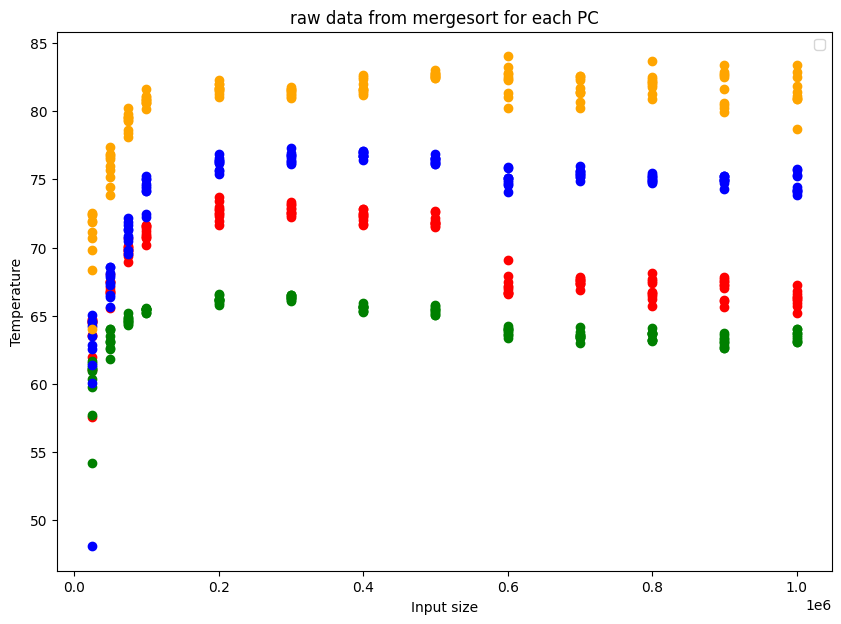

In [165]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Temperature"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Temperature"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Temperature"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Temperature"],"o", color = "orange")
plt.title("raw data from mergesort for each PC")
plt.xlabel("Input size")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Energy vs Time 

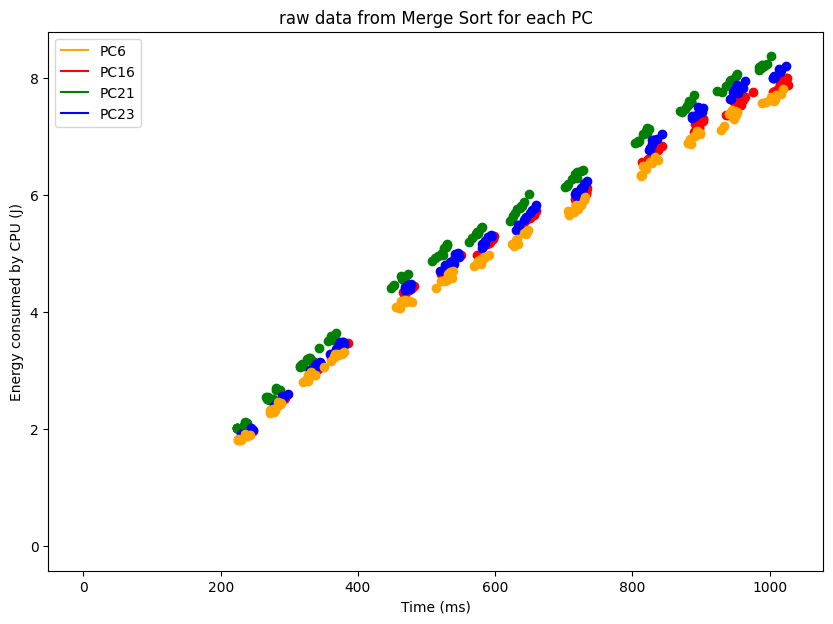

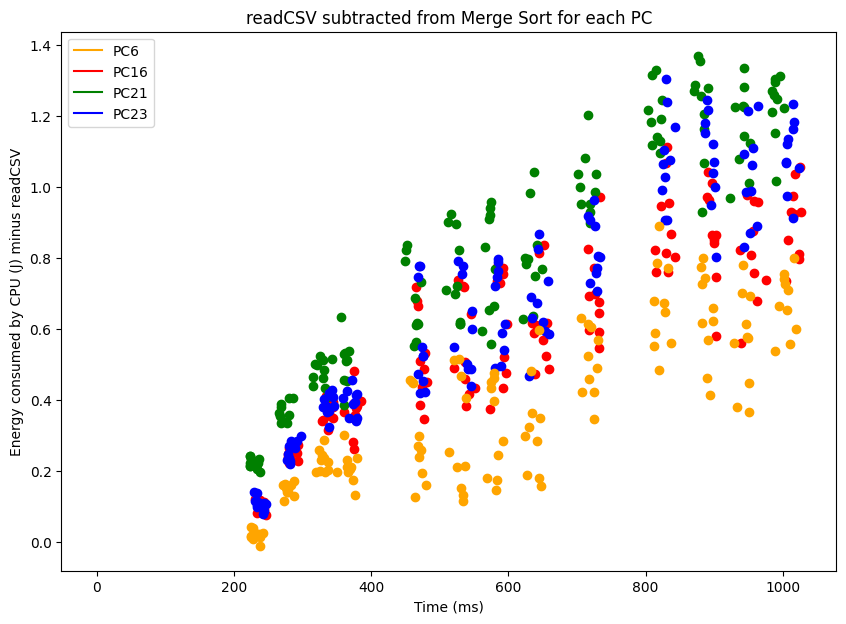

In [173]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU (J)"],"o", color = "orange")

plt.plot(0, 0, color = "orange", label='PC6')
plt.plot(0, 0, color = "red", label='PC16')
plt.plot(0, 0, color = "green", label='PC21')
plt.plot(0, 0, color = "blue", label='PC23')
plt.title("raw data from Merge Sort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.plot(0, 0, color = "orange", label='PC6')
plt.plot(0, 0, color = "red", label='PC16')
plt.plot(0, 0, color = "green", label='PC21')
plt.plot(0, 0, color = "blue", label='PC23')
plt.title("readCSV subtracted from Merge Sort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.legend()
plt.show()